# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [31]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd
from webdriver_manager.chrome import ChromeDriverManager

In [32]:
# Automatically download and use the correct version of ChromeDriver
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [33]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [34]:
# Create a Beautiful Soup Object
# Get the HTML content of the page
temperature_html = browser.html

# Create a Beautiful Soup object
temperature_soup = soup(temperature_html, 'html.parser')

# Find the HTML table on the page
table = temperature_soup.find('table')

In [35]:
# Extract all rows of data
table_data = []
for row in table.find_all('tr'):
    columns = row.find_all(['th', 'td'])
    row_data = [column.text.strip() for column in columns]
    table_data.append(row_data)

# Print the scraped data
for row in table_data:
    print(row)

['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']
['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0']
['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0']
['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0']
['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0']
['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0']
['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0']
['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0']
['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0']
['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0']
['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0']
['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0']
['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0']
['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0']
['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0']
['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0']
['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0']
['171', 

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [36]:
# Create an empty list
rows_list = []
# Loop through the scraped data to create a list of rows
for data in table_data[1:]:  # Skip the first row as it contains column headings
    row_dict = dict(zip(table_data[0], data))
    rows_list.append(row_dict)


In [37]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
column_names = table_data[0]
temperature_df = pd.DataFrame(rows_list, columns=column_names)

In [38]:
# Confirm DataFrame was created successfully
print(temperature_df)

        id terrestrial_date   sol   ls month min_temp pressure
0        2       2012-08-16    10  155     6    -75.0    739.0
1       13       2012-08-17    11  156     6    -76.0    740.0
2       24       2012-08-18    12  156     6    -76.0    741.0
3       35       2012-08-19    13  157     6    -74.0    732.0
4       46       2012-08-20    14  157     6    -74.0    740.0
...    ...              ...   ...  ...   ...      ...      ...
1862  1889       2018-02-23  1973  133     5    -78.0    730.0
1863  1892       2018-02-24  1974  134     5    -77.0    729.0
1864  1894       2018-02-25  1975  134     5    -76.0    729.0
1865  1893       2018-02-26  1976  135     5    -77.0    728.0
1866  1895       2018-02-27  1977  135     5    -77.0    727.0

[1867 rows x 7 columns]


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [39]:
# Examine data type of each column
print("Data Types:")
print(temperature_df.dtypes)

Data Types:
id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [40]:
# Change data types for data analysis
# Convert 'terrestrial_date' column to datetime type
temperature_df['terrestrial_date'] = pd.to_datetime(temperature_df['terrestrial_date'])

# Convert 'sol' column to int type
temperature_df['sol'] = temperature_df['sol'].astype(int)

# Convert 'ls' column to float type
temperature_df['ls'] = temperature_df['ls'].astype(float)

# Convert 'month' column to int type
temperature_df['month'] = temperature_df['month'].astype(int)

# Convert 'min_temp' column to float type
temperature_df['min_temp'] = temperature_df['min_temp'].astype(float)

# Convert 'pressure' column to float type
temperature_df['pressure'] = temperature_df['pressure'].astype(float)

In [41]:
# Confirm type changes were successful by examining data types again
print("Updated Data Types:")
print(temperature_df.dtypes)

Updated Data Types:
id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                         float64
month                        int32
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [42]:
# 1. How many months are there on Mars?
num_months = temperature_df['month'].nunique()
print(f"1. Number of months on Mars: {num_months}")

1. Number of months on Mars: 12


In [43]:
# 2. How many Martian days' worth of data are there?
num_martian_days = temperature_df['sol'].nunique()
print(f"2. Number of Martian days in the dataset: {num_martian_days}")

2. Number of Martian days in the dataset: 1867


In [44]:
# 3. What is the average low temperature by month?
average_min_temp = temperature_df.groupby('month')['min_temp'].mean()

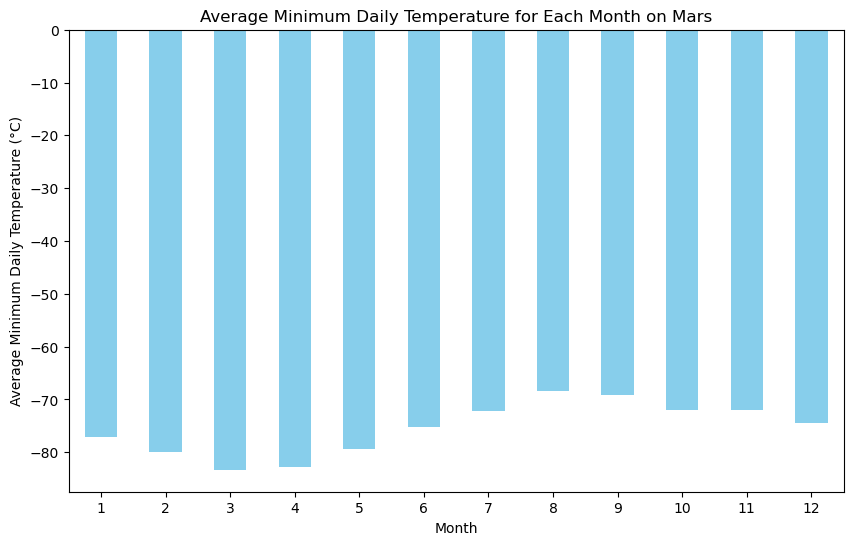

In [45]:
# Plot the average temperature by month
plt.figure(figsize=(10, 6))
average_min_temp.plot(kind='bar', color='skyblue')
plt.title('Average Minimum Daily Temperature for Each Month on Mars')
plt.xlabel('Month')
plt.ylabel('Average Minimum Daily Temperature (°C)')
plt.xticks(rotation=0)
plt.show()

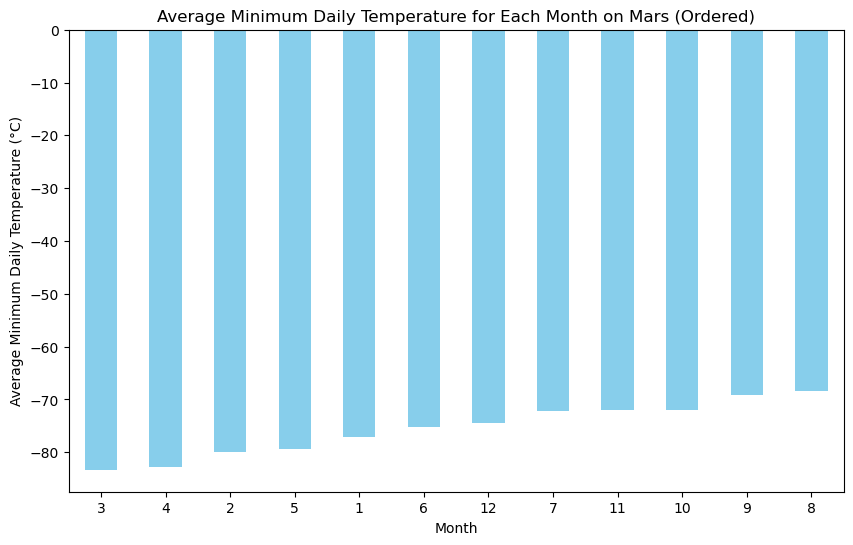

In [46]:
# Identify the coldest and hottest months in Curiosity's location
ordered_months = average_min_temp.sort_values().index
# Plot the average temperature by month in order
plt.figure(figsize=(10, 6))
average_min_temp[ordered_months].plot(kind='bar', color='skyblue')
plt.title('Average Minimum Daily Temperature for Each Month on Mars (Ordered)')
plt.xlabel('Month')
plt.ylabel('Average Minimum Daily Temperature (°C)')
plt.xticks(rotation=0)
plt.show()

In [47]:
# 4. Average pressure by Martian month
temperature_df['pressure'] = temperature_df['pressure'].astype(float)
average_pressure = temperature_df.groupby('month')['pressure'].mean()

print("Average pressure by Martian", average_pressure)

Average pressure by Martian month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


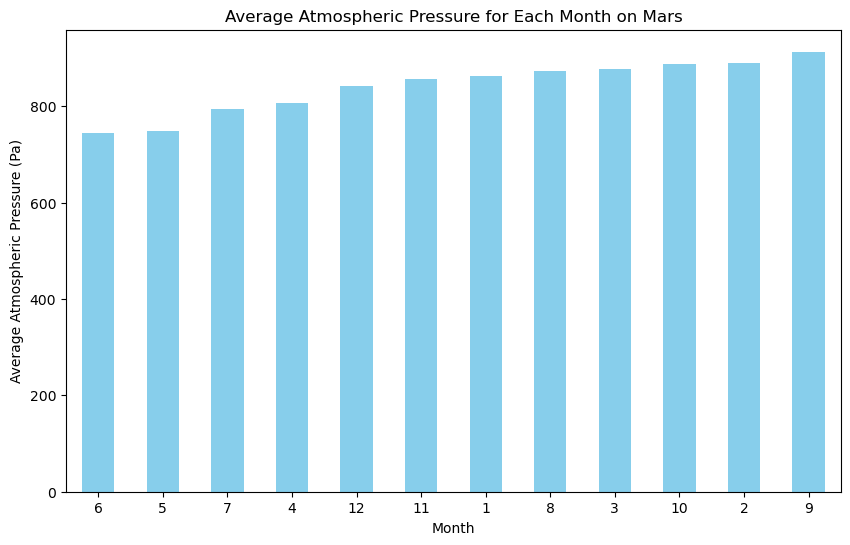

In [48]:
#Put months in correct order
ordered_months_pressure = average_pressure.sort_values().index

# Plot the average pressure by month
plt.figure(figsize=(10, 6))
average_pressure[ordered_months_pressure].plot(kind='bar', color='skyblue')
plt.title('Average Atmospheric Pressure for Each Month on Mars')
plt.xlabel('Month')
plt.ylabel('Average Atmospheric Pressure (Pa)')
plt.xticks(rotation=0)
plt.show()

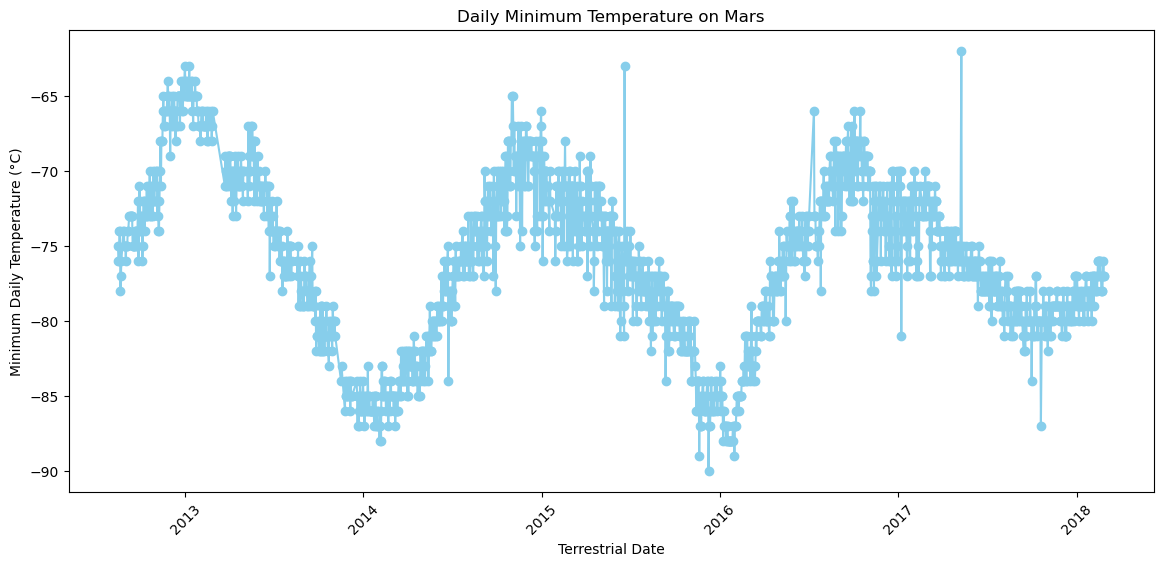

In [49]:
# 5. How many terrestrial (earth) days are there in a Martian year?
plt.figure(figsize=(14, 6))
plt.plot(temperature_df['terrestrial_date'], temperature_df['min_temp'], marker='o', linestyle='-', color='skyblue')
plt.title('Daily Minimum Temperature on Mars')
plt.xlabel('Terrestrial Date')
plt.ylabel('Minimum Daily Temperature (°C)')
plt.xticks(rotation=45)
plt.show()

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [50]:
# Write the data to a CSV
temperature_df.to_csv('mars_temperature_data.csv', index=False)

In [51]:
browser.quit()